# This notebook offers some experiments on the paper:


"Globally and Locally Consistent Image Completion", SATOSHI IIZUKA, EDGAR SIMO-SERRA,
HIROSHI ISHIKAWA

The employed code comes from https://github.com/akmtn/pytorch-siggraph2017-inpainting

It requires a PyTorch version below 1.0.

In [20]:
from src.masking import run_draw
from src.inpaint import inpainting, load_network, random_mask, load_mask, load_data
import cv2
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import os
import urllib

model, datamean = load_network()
filename = "completionnet_places2.t7"
url = "http://hi.cs.waseda.ac.jp/~iizuka/data/completionnet_places2.t7"

if not os.path.isfile(filename):
    urllib.urlretrieve(url, filename)

# 1. Simple tests on an image
Code from https://stackoverflow.com/a/36382158/4986615

Press ESC to quit the windows.

In [11]:
img = cv2.imread("images/bridge.jpg")
run_draw(img, "mask.png")

Save image


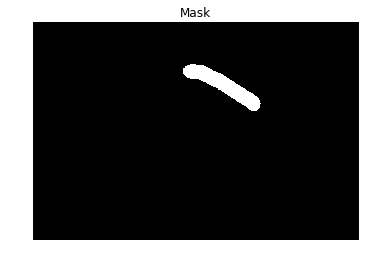

In [14]:
plt.figure()
mask = cv2.imread("mask.png")
plt.imshow(mask)
plt.axis('off')
plt.title("Mask")
plt.show()

In [21]:
M = load_mask("mask.png")
I = load_data("images/bridge.jpg", output_shape=(600, 400))
out = inpainting(model, datamean, I, M)
vutils.save_image(out, 'out.png', normalize=True)

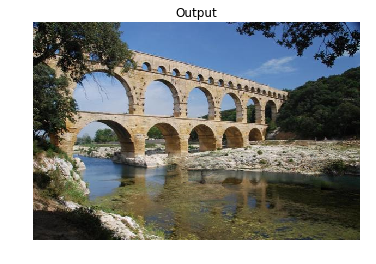

In [24]:
plt.figure()
out = cv2.imread("out.png")[:,:,::-1] 
plt.imshow(out)
plt.axis('off')
plt.title("Output")
plt.show()